# GDV - Lab 1 - Project Student Submission
-----------------------

Authors: Bryan Van Huyneghem & Anoek Strumane (group 8)

## 1. Exploratory Data Analysis for the 911 dataset

## 1.2 Preprocessing

When exploring the 911 dataset it becomes clear that not a lot of preprocessing is needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_set = pd.read_csv('911.csv')

data_set.info()

data_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


The dataset consists of nine columns, being
- lat: the latitude
- lng: the longitude
- desc: a description delimited by ';' containing information such as street, township, time of the event... of which most can be found in other columns.
- zip: the zipcode
- title: the titel of the event, denoting the type of event that is called for. This column consists of two values delimited by ':'. The first being the department the call was for. These can be either EMS ([Emergency Medical Services](https://en.wikipedia.org/wiki/Emergency_medical_services_in_the_United_States)), the fire (the fire department) or traffic. The second value indicates the what type of incident led to the call. 
- timeStamp: the date and time of the call
- twp: the [township](https://en.wikipedia.org/wiki/Township_(United_States)?fbclid=IwAR3KJxtMwvE1uurEO0XGbfBA3l0yA9163654385LNl-fuysVDVvSPWnDmTg)
- addr: the address
- e: a dummy value that is always 1



At first glance one NaN value can be seen and it is clear that further inspectation into empty attributes is needed. 

In [2]:
print(data_set.isnull().sum().sum())

print(data_set['lat'].isnull().sum())
print(data_set['lng'].isnull().sum())
print(data_set['desc'].isnull().sum())
print(data_set['zip'].isnull().sum())
print(data_set['title'].isnull().sum())
print(data_set['timeStamp'].isnull().sum())
print(data_set['twp'].isnull().sum())
print(data_set['addr'].isnull().sum())


80492
0
0
0
80199
0
0
293
0


This data shows that the only colums that contain empty attributes are the zipcode and the township. As these columns will not be used in the further data analysis proces, their null values can be ignored. It is important to note that if these coulmns are used in later work, the null rows must either be dropped or must be predicted. For example, the zipcode could be predicted by searching for other entries with the same township and copying their zipcode. 

## 1.2 EDA

As the focus of this data exploration is going to lay mostly on the type of call that was made, the first step is to see what options the 'title' column has.

In [3]:
data_set['title'].unique().tolist()

['EMS: BACK PAINS/INJURY',
 'EMS: DIABETIC EMERGENCY',
 'Fire: GAS-ODOR/LEAK',
 'EMS: CARDIAC EMERGENCY',
 'EMS: DIZZINESS',
 'EMS: HEAD INJURY',
 'EMS: NAUSEA/VOMITING',
 'EMS: RESPIRATORY EMERGENCY',
 'EMS: SYNCOPAL EPISODE',
 'Traffic: VEHICLE ACCIDENT -',
 'EMS: VEHICLE ACCIDENT',
 'Traffic: DISABLED VEHICLE -',
 'Fire: APPLIANCE FIRE',
 'EMS: GENERAL WEAKNESS',
 'Fire: CARBON MONOXIDE DETECTOR',
 'EMS: UNKNOWN MEDICAL EMERGENCY',
 'EMS: UNRESPONSIVE SUBJECT',
 'Fire: VEHICLE ACCIDENT',
 'EMS: ALTERED MENTAL STATUS',
 'Fire: FIRE ALARM',
 'EMS: CVA/STROKE',
 'Traffic: ROAD OBSTRUCTION -',
 'EMS: SUBJECT IN PAIN',
 'EMS: HEMORRHAGING',
 'EMS: FALL VICTIM',
 'EMS: ASSAULT VICTIM',
 'EMS: SEIZURES',
 'EMS: MEDICAL ALERT ALARM',
 'EMS: ABDOMINAL PAINS',
 'Fire: PUMP DETAIL',
 'Fire: FIRE INVESTIGATION',
 'EMS: OVERDOSE',
 'EMS: MATERNITY',
 'EMS: UNCONSCIOUS SUBJECT',
 'EMS: CHOKING',
 'EMS: LACERATIONS',
 'Fire: TRASH/DUMPSTER FIRE',
 'Fire: UNKNOWN TYPE FIRE',
 'Fire: BUILDING FIRE',

Other focus will be based around the date and time certain calls take place. So the values hour, week and year are extracted from the timeStamp column and added to the dataframe.

In [4]:
data_set['hour'] = pd.to_datetime(data_set['timeStamp']).dt.hour
data_set['week'] = pd.to_datetime(data_set['timeStamp']).dt.week
data_set['year'] = pd.to_datetime(data_set['timeStamp']).dt.year

### 1.2.1. EMS calls per week

For this analysis only the calls of title 'EMS: ASSAULT VICTIM' are needed. The only columns that will be used of these rows are week and year. A second dataframe is created consisting of only these usefull rows and columns. This second dataframe is not a deepcopy so changes in this object will result in changes in the original dataframe. This is not a problem as no data will be changed.

In [5]:
assault_victims = pd.DataFrame(data_set.loc[data_set['title'] == 'EMS: ASSAULT VICTIM'])
assault_victims = assault_victims[["year", "week", "e"]]
assault_victims

,year,week,e
65,2015,50,1
388,2015,50,1
423,2015,50,1
557,2015,50,1
657,2015,50,1
...,...,...,...
663105,2020,31,1
663363,2020,31,1
663367,2020,31,1
663477,2020,31,1


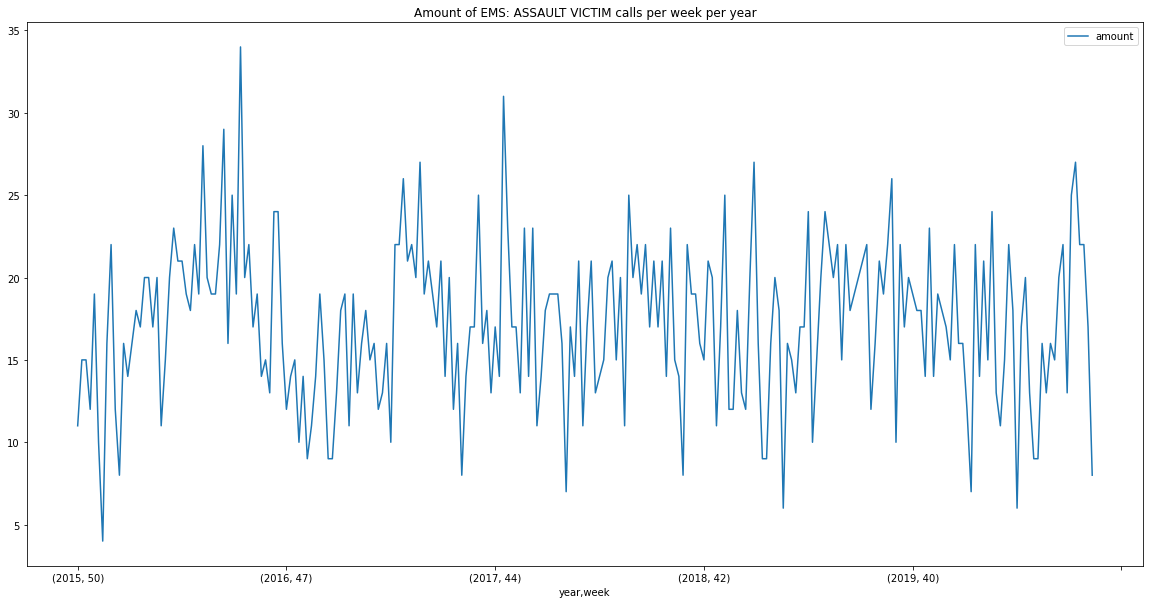

In [6]:

weekly_sum = assault_victims.groupby(['year','week']).count()
weekly_sum = weekly_sum.rename(columns = {'e':'amount'})

weekly_sum.plot.line(y='amount', title='Amount of EMS: ASSAULT VICTIM calls per week per year', figsize=(20,10))

A few conclusions can be made when looking at this graph. First of all, a peak can be spotted halfway through 2016. The average amount of assault victim calls to the emercency medical services during these weeks is clearly higher than in the rest of the data. At the end of 2016 through the beginning of 2017 there is a dip in cases. After this, the graph stabilizes. It still has random highs and lows but the average over the weeks is quite stable and no clear pattern can be seen. 

### 1.2.2. Calls per department

In this step, the amount of calls per department are analysed. The three options for these departments are EMS, fire and traffic. The only information needed for this section is the first part of the 'title' column. Therefor the 'title' column from the original dataframe is split and copied into a new dataframe.

In [7]:
types = data_set['title'].str.split(pat=":", expand = True)

In [8]:
types

,0,1
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS
...,...,...
663517,Traffic,VEHICLE ACCIDENT -
663518,EMS,GENERAL WEAKNESS
663519,EMS,VEHICLE ACCIDENT
663520,Fire,BUILDING FIRE


In [9]:
types = types.rename(columns={0:'type'})
types

,type,1
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS
...,...,...
663517,Traffic,VEHICLE ACCIDENT -
663518,EMS,GENERAL WEAKNESS
663519,EMS,VEHICLE ACCIDENT
663520,Fire,BUILDING FIRE


Text(0.5, 1.0, 'Number of calls per department')

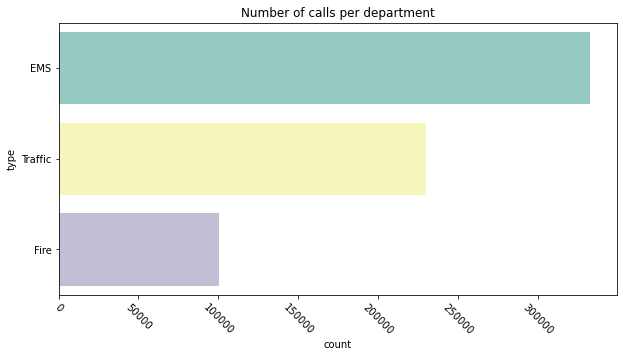

In [10]:
plt.subplots(figsize=(10,5))
sns.countplot(y='type', data=types, palette="Set3", order = types['type'].value_counts().index)
plt.xticks(rotation=-45)
plt.title('Number of calls per department')

This graph makes it clear that emergency medical services make up around half of the cases. Besides this, traffic calls occur around one third of the time while fire calls only make up one sixth of all calls.

### 1.2.3. Distribution of the most common fire department calls

Once again the 'title' column has to be split into two parts. However, in this case the year of the call is also necessary. To keep the year linked to the split 'title', the 'title' column is first split into new columns the original dataframe. After this a copy is made of this dataframe containing only the type and the year of calls made to fire departments.

In [11]:
data_set[['department','type']] = data_set['title'].str.split(pat=":", expand = True)
fire_dep = pd.DataFrame(data_set.loc[data_set['department'] == 'Fire'])
fire_dep_per_year = pd.DataFrame(fire_dep.loc[:,['type', 'year']])
fire_dep_per_year

,type,year
2,GAS-ODOR/LEAK,2015
22,APPLIANCE FIRE,2015
27,CARBON MONOXIDE DETECTOR,2015
39,GAS-ODOR/LEAK,2015
45,VEHICLE ACCIDENT,2015
...,...,...
663495,WOODS/FIELD FIRE,2020
663501,GAS-ODOR/LEAK,2020
663510,VEHICLE FIRE,2020
663516,FIRE ALARM,2020


The calls per year of the ten most occuring types are counted.

In [12]:
n = 10
list = fire_dep_per_year['type'].value_counts()[:n].index.tolist()

most_occuring_fire_dep = pd.DataFrame(fire_dep_per_year.loc[fire_dep_per_year['type'].isin(list)])
most_occuring_fire_dep

,type,year
2,GAS-ODOR/LEAK,2015
27,CARBON MONOXIDE DETECTOR,2015
39,GAS-ODOR/LEAK,2015
45,VEHICLE ACCIDENT,2015
49,FIRE ALARM,2015
...,...,...
663495,WOODS/FIELD FIRE,2020
663501,GAS-ODOR/LEAK,2020
663510,VEHICLE FIRE,2020
663516,FIRE ALARM,2020


Text(0.5, 1.0, 'Most occuring fire department calls per year')

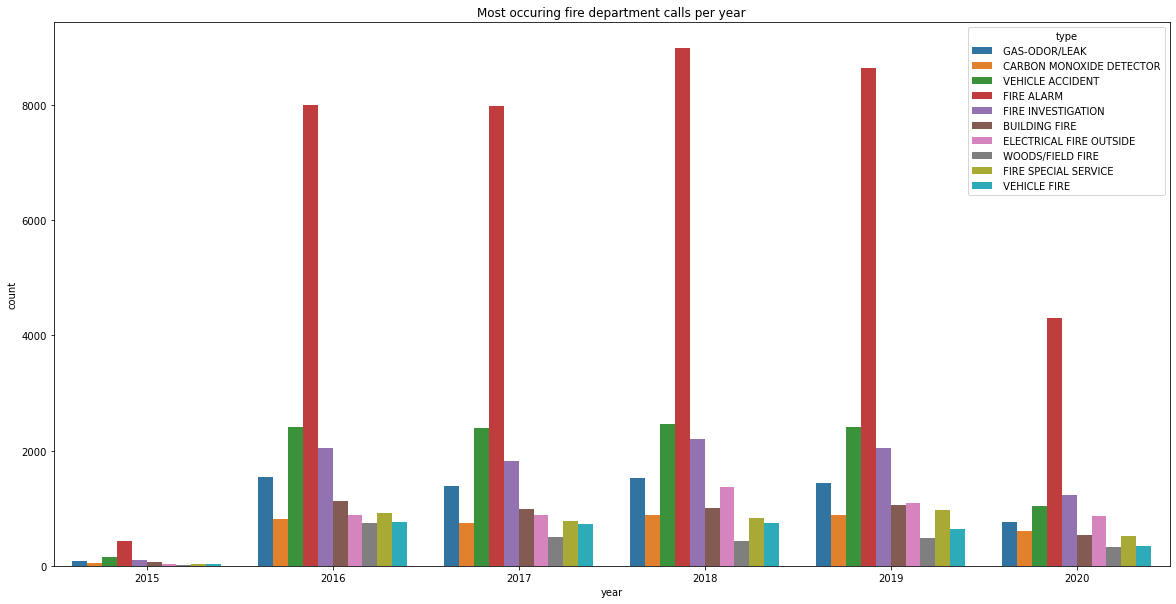

In [13]:
plt.subplots(figsize=(20,10))
sns.countplot(x='year', hue='type', data=most_occuring_fire_dep)
plt.title('Most occuring fire department calls per year')

It should first be mentioned that the dataset starts in the end of 2015 and ends in July 2020, which is why these years have a lower count than the rest. Fire alarms being the most common reason for fire department calls can clearly be derived from this graph. Upon closer inspection the graph shows a very stable flow each year. Moest types are almost exactly as frequent in each year. Both 'fire investigation' and 'electrical fire outside' show minor fluctuations, with 'electrical fire outside' showing a clear peak in 2018. Fluctuations can also be seen in 'fire alarm' calls, but proportianaly to the rest, these fluctuations are very minor. 

### 1.2.4. Correlation between the time of day and the most frequent EMS calls

Only the rows containing calls for the EMS are usefull and only the hour and type columns are needed. Only the 20 most occuring types are kept. The reasoning behind the 25 most frequent types is the fact that there is insufficient data about the other types to make any clear conclusions.

In [14]:
ems = pd.DataFrame(data_set.loc[data_set['department'] == 'EMS'])
ems_with_hour = pd.DataFrame(ems.loc[:,['type', 'hour', 'e']])
ems_with_hour

n = 20
list = ems_with_hour['type'].value_counts()[:n].index.tolist()

most_occuring_ems_with_hour = pd.DataFrame(ems_with_hour.loc[ems_with_hour['type'].isin(list)])
most_occuring_ems_with_hour

,type,hour,e
1,DIABETIC EMERGENCY,17,1
3,CARDIAC EMERGENCY,16,1
5,HEAD INJURY,15,1
6,NAUSEA/VOMITING,16,1
7,RESPIRATORY EMERGENCY,16,1
...,...,...,...
663509,SYNCOPAL EPISODE,15,1
663511,RESPIRATORY EMERGENCY,15,1
663512,FALL VICTIM,15,1
663518,GENERAL WEAKNESS,15,1


In [15]:
ems_types_per_hour = most_occuring_ems_with_hour.groupby(by=['hour','type']).count()['e'].unstack()
ems_types_per_hour = ems_types_per_hour.transpose()
ems_types_per_hour


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
type,,,,,,,,,,,,,,,,,,,,,
ABDOMINAL PAINS,317,296,289,253,262,236,290,336,391,486,...,427,428,428,406,362,417,384,393,369,299
ALTERED MENTAL STATUS,168,172,127,110,128,136,193,280,494,631,...,633,638,583,545,528,514,407,363,269,238
CARDIAC ARREST,185,153,123,139,116,220,191,234,247,260,...,235,262,239,270,269,279,276,267,229,214
CARDIAC EMERGENCY,889,814,736,680,678,713,809,1072,1520,2018,...,1906,1734,1554,1434,1427,1454,1286,1264,1153,928
CVA/STROKE,104,77,90,74,93,103,175,312,492,613,...,514,466,482,449,441,386,360,243,211,147
DIABETIC EMERGENCY,228,164,149,133,109,134,157,190,229,267,...,292,271,303,343,280,300,271,280,226,204
FALL VICTIM,893,766,723,720,779,865,1046,1399,1719,1947,...,1876,1882,1861,1836,1771,1679,1479,1335,1133,928
GENERAL WEAKNESS,193,138,139,140,130,191,290,459,736,907,...,729,668,641,662,551,491,368,311,235,203
HEAD INJURY,396,360,319,308,324,361,433,693,827,934,...,1129,1136,1068,1044,998,975,878,698,587,513


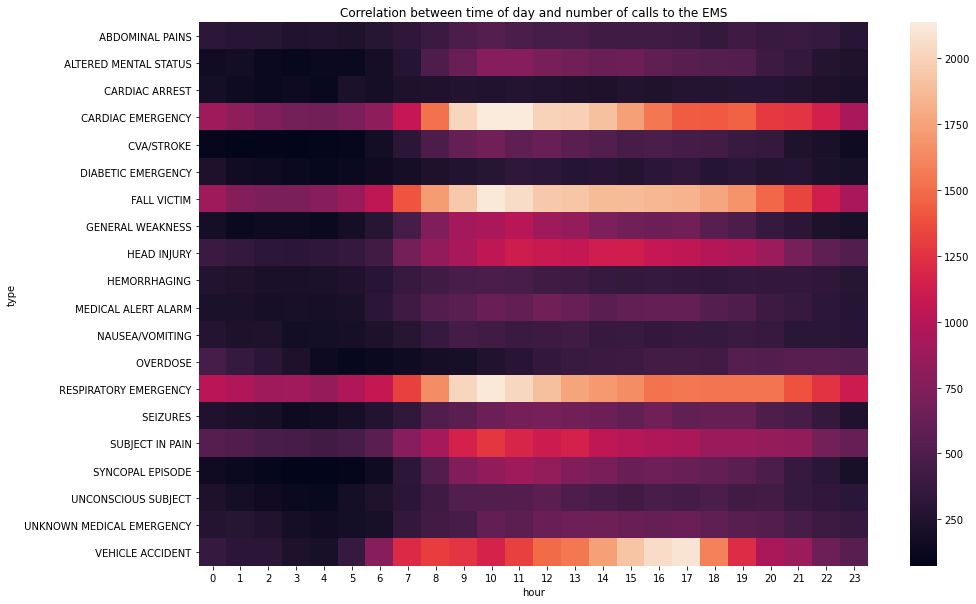

In [16]:

plt.subplots(figsize=(15,10))
sns.heatmap(ems_types_per_hour)
plt.title('Correlation between time of day and number of calls to the EMS')
plt.show()

At first glance, three types of emergencies show a very similar pattern. These types are cariac emergency, fall victiom and respitory emergency. Their cases shoot up steeply in the morning, and then gradually decrease throughout the day. This is linked to the fact that these three types of emergencies are induced by physical activity and people tend to be active throughout the day and are more at rest in the morning, in the evening and at night. Emergencies such as a head injury, CVA/stroke, general weekness... also seem to follow the same trend, but not as obviosuly as these occur less frequently.

Things such as fever and abdominal pains show no clear pattern. In contradiction to the cases in the first paragraph, these emergencies are usually not induced by any kind of physical movement and can occur at any time of day.

Another pattern can be seen in those that occur more frequently in the evening and at night. Examples are overdose and assault victims. This can be explained by the fact that these types of emergencies rarely occur when the victim is at work and are more frequent when they are in a home.

Lastly, traffic related emergencies such as vehicle accidents follow a very logical vourse too. A small peak is seen around 8 in the morning, when most people head to work or to school and a larger peak is seen in the late afternoon, when these people head back. These are obviously the times in which the roads are at their busiest.

## 2. Exploratory Data Analysis for the CoViD dataset

The CoViD dataset comes as many csv files, one for each day, that have to be combined into one dataframe. We will first load all csv files into dataframes using pandas and afterwards merge these into one large dataframe.

## 2.1 Initial csv header exploration

Upon exploring the csv files and interpreting their columns, it becomes apparent:
* that not all csv files have the same (amount of) columns;
* that certain columns have names that closely resemble each other, e.g. **Country_Region** and **Country/Region**;
* that certain columns only appear to have entries for certain countries, e.g. **FIPS** (Federal Information Processing Standards ([source](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standards))) is a column unique to entries related to the U.S., however the FIPS of 250.0 relates to France;
* that countries that have data on multiple of their provinces have a column named **Combined_Key**, which combines data from three comlumns, i.e. **Admin2**, **Province_State** and **Country_Region** into one column. 

Closer inspection reveals: 

* that the csv files use **Province/State** , **Country/Region**, **Last Update**, **Latitude** and **Longitude** rather than **Province_State**, **Country_Region**, **Last_Update**, **Lat** and **Long_** until *03-24-2020*;
* **Incidence_Rate** and **Case-Fatality_Ratio** are added from *05-29-2020* and onwards. No csv file before this date contains these columns;
* *Mainland China* turns into *China* in later csv files, but these two inidicate the same region. Thus, *Mainland China* needs to be changed to *China*.
* the column **Last Update** uses different timestamps than **Last_Update**. We will have to parse the former dates into the same format as entries for **Last_Update**. 

Thus, it makes sense to first import all csv files until 03-24-2020 and change their column names appropriately, so that they match the column names of all other csv files.

## 2.2 Preprocessing

We should first note that we have chosen to append all data to each other, because this will allow us to easily group by regions. Alternatively, we could have use a multi index, using the **Country_Region**, **Province_State** and **Admin2** as indices, which would result in a row for every unique location in the dataset and a column for every date. This could be interesting for time series analysis, but we have opted to instead stick to our initial approach of appending information. This results in one column for the data, i.e. **Last_Update**.

In [17]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob


In [18]:
print(os.getcwd())

/workspaces/gdv-project-2020-group-8


In [19]:
# List of all files in the directory
all_files = glob.glob("covid/*.csv")
print("Total amount of csv files:", len(all_files))

Total amount of csv files: 237


### 2.2.1 Preprocessing the initial csv files

The code below appends all csv files from until March 21st into one dataframe. A value count shows us the unique countries/regions. We notice that originally *Mainland China* was used, but that this later turns into *China*. Thus, it makes sense to convert *Mainland China* into *China*.

In [20]:
df = None

i = 0
for csv_file in all_files:
    i += 1
    print(i, end=" ")
    if csv_file == "covid/03-22-2020.csv":
        break;
    if df is None:
        df = pd.read_csv(csv_file)
    else:
        df = df.append(pd.read_csv(csv_file))

# Show all unique values in the Country/Region column
df["Country/Region"].value_counts()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

US                            1560
Mainland China                1517
China                          363
Australia                      314
Canada                         242
                              ... 
North Ireland                    1
Iran (Islamic Republic of)       1
Republic of Korea                1
Uganda                           1
Channel Islands                  1
Name: Country/Region, Length: 210, dtype: int64

In [21]:
df.head(10)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN,NaN,NaN
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,NaN,NaN,NaN,NaN
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
8,Hainan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN,NaN,NaN
9,Hebei,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN


In [22]:
df.shape

(7617, 8)

We must now rename *Mainland China* to *China* and also appropriately rename the columns for convenient's sake during the appends: 
* **Province/State** ==> **Province_State**
* **Country/Region** ==> **Country_Region**
* **Latitude** remains the same
* **Longitude** remains the same
* **Last Update** ==> **Last_Update**

In [23]:
# Rename "Mainland China" to "China"
df["Country/Region"].replace({"Mainland China": "China"}, inplace=True)

df.head(10)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
5,Guangdong,China,1/22/2020 17:00,26.0,NaN,NaN,NaN,NaN
6,Guangxi,China,1/22/2020 17:00,2.0,NaN,NaN,NaN,NaN
7,Guizhou,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
8,Hainan,China,1/22/2020 17:00,4.0,NaN,NaN,NaN,NaN
9,Hebei,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN


In [24]:
# Rename the columns as mentioned above
df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region", "Last Update": "Last_Update"}, inplace=True)

df.head(10)

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
5,Guangdong,China,1/22/2020 17:00,26.0,NaN,NaN,NaN,NaN
6,Guangxi,China,1/22/2020 17:00,2.0,NaN,NaN,NaN,NaN
7,Guizhou,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
8,Hainan,China,1/22/2020 17:00,4.0,NaN,NaN,NaN,NaN
9,Hebei,China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN


We also note that certain entries have the same index. Thus, we will reset the index using reset_index() because the index does not matter.

In [25]:
df = df.reset_index(drop=True)

The entries in the column **Last_Update** must be parsed correctly to the format that is used in the csv files that have not yet been handled.

There are two formats:
* e.g. *1/22/2020 17:00*
* e.g. *2020-02-25T15:23:04*

These must be converted to the format:
* e.g. *2020-03-23 23:19:34*

We can do this using the <code>parse</code> from <code>dateutil.parser</code>.

In [26]:
# Run me to install the dateutil package
!pip install python-dateutil

In [27]:
from dateutil.parser import parse
from datetime import datetime

# Parses a given time to international format "YYYY-MM-DD HH-MM-SS"
def parseTime(time_entry):
    return parse(time_entry)


df["Last_Update"] = df["Last_Update"].apply(lambda time_entry: parseTime(time_entry))
df.head(10)

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,China,2020-01-22 17:00:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,China,2020-01-22 17:00:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN
5,Guangdong,China,2020-01-22 17:00:00,26.0,NaN,NaN,NaN,NaN
6,Guangxi,China,2020-01-22 17:00:00,2.0,NaN,NaN,NaN,NaN
7,Guizhou,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN
8,Hainan,China,2020-01-22 17:00:00,4.0,NaN,NaN,NaN,NaN
9,Hebei,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN


### 2.2.2 Preprocessing the remaining csv files

We counted the number of files (i) that we have already read in (until March 21st), thus we can take a slice from our original <code>all_files</code> list and then append all the remaining csv files into one dataframe.

In [28]:
j = i-1
remaining_files = all_files[j:]
print("Current amount of files read: {}.".format(j), "Remaining files: {}".format(len(remaining_files)))
print("Starting from file:", remaining_files[0])

df2 = None
for csv_file in remaining_files:
    j += 1
    print(j, end=" ")
    if df2 is None:
        df2 = pd.read_csv(csv_file)
    else:
        df2 = df2.append(pd.read_csv(csv_file))

print("\nShape of dataframe df2:", df2.shape)

Current amount of files read: 60. Remaining files: 177
Starting from file: covid/03-22-2020.csv
61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 
Shape of dataframe df2: (634619, 14)


In [29]:
df2.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,36061.0,New York City,New York,US,3/22/20 23:45,40.767273,-73.971526,9654,63,0,0.0,"New York City, New York, US",NaN,NaN
1,36059.0,Nassau,New York,US,3/22/20 23:45,40.740665,-73.589419,1900,4,0,0.0,"Nassau, New York, US",NaN,NaN
2,36119.0,Westchester,New York,US,3/22/20 23:45,41.162784,-73.757417,1873,0,0,0.0,"Westchester, New York, US",NaN,NaN
3,36103.0,Suffolk,New York,US,3/22/20 23:45,40.883201,-72.801217,1034,9,0,0.0,"Suffolk, New York, US",NaN,NaN
4,36087.0,Rockland,New York,US,3/22/20 23:45,41.150279,-74.025605,455,1,0,0.0,"Rockland, New York, US",NaN,NaN
5,36071.0,Orange,New York,US,3/22/20 23:45,41.403375,-74.302408,247,0,0,0.0,"Orange, New York, US",NaN,NaN
6,36001.0,Albany,New York,US,3/22/20 23:45,42.600603,-73.977239,123,0,0,0.0,"Albany, New York, US",NaN,NaN
7,36027.0,Dutchess,New York,US,3/22/20 23:45,41.764861,-73.743567,82,0,0,0.0,"Dutchess, New York, US",NaN,NaN
8,36055.0,Monroe,New York,US,3/22/20 23:45,43.146389,-77.693229,68,1,0,0.0,"Monroe, New York, US",NaN,NaN
9,36029.0,Erie,New York,US,3/22/20 23:45,42.762490,-78.730637,56,0,0,0.0,"Erie, New York, US",NaN,NaN


We will rename the columns **Lat** and **Long_** to **Latitude** and **Longitude**.

In [30]:
# Rename the columns as mentioned above
df2.rename(columns={"Lat": "Latitude", "Long_" : "Longitude"}, inplace=True)

df2.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,36061.0,New York City,New York,US,3/22/20 23:45,40.767273,-73.971526,9654,63,0,0.0,"New York City, New York, US",NaN,NaN
1,36059.0,Nassau,New York,US,3/22/20 23:45,40.740665,-73.589419,1900,4,0,0.0,"Nassau, New York, US",NaN,NaN
2,36119.0,Westchester,New York,US,3/22/20 23:45,41.162784,-73.757417,1873,0,0,0.0,"Westchester, New York, US",NaN,NaN
3,36103.0,Suffolk,New York,US,3/22/20 23:45,40.883201,-72.801217,1034,9,0,0.0,"Suffolk, New York, US",NaN,NaN
4,36087.0,Rockland,New York,US,3/22/20 23:45,41.150279,-74.025605,455,1,0,0.0,"Rockland, New York, US",NaN,NaN
5,36071.0,Orange,New York,US,3/22/20 23:45,41.403375,-74.302408,247,0,0,0.0,"Orange, New York, US",NaN,NaN
6,36001.0,Albany,New York,US,3/22/20 23:45,42.600603,-73.977239,123,0,0,0.0,"Albany, New York, US",NaN,NaN
7,36027.0,Dutchess,New York,US,3/22/20 23:45,41.764861,-73.743567,82,0,0,0.0,"Dutchess, New York, US",NaN,NaN
8,36055.0,Monroe,New York,US,3/22/20 23:45,43.146389,-77.693229,68,1,0,0.0,"Monroe, New York, US",NaN,NaN
9,36029.0,Erie,New York,US,3/22/20 23:45,42.762490,-78.730637,56,0,0,0.0,"Erie, New York, US",NaN,NaN


We notice that the FIPS values are not unique. Closer inspection is warranted.

In [31]:
df2["FIPS"].value_counts()

90049.0    193
32007.0    181
35013.0    180
53071.0    178
11001.0    178
          ... 
60000.0      9
78000.0      9
2105.0       9
49041.0      9
250.0        7
Name: FIPS, Length: 3293, dtype: int64

The FIPS of 250.0 shows us that it relates to the **Country_Region** *France*. This also shows us that the **Combined_Key** is sometimes *,,France* and sometimes *France*. Thus, we will have to check this for all countries and fix it to ensure consistency. One way to ensure that this is the same for *all* entries, is to simply recreate it, because it is an entry that is created using three other columns in the dataset. 

In effect, we could state that this column is undesired, because it adds no new information that isn't already present in the dataset. However, it may prove useful when accessing specific information for an **Admin2** (city) in a particular country, especially because countries may have the same **Admin2** (city) name. This would be one way of ensuring we have the right city. Another way would be to specificy from the city and region when selecting rows, which means we would no longer need this **Combined_Key** column. 

Note that the dataframe <code>df</code> does not contain this **Combined_Key** column and would thus have no entries for this column. These entries would have to be built from the aforementioned columns. If the **Combined_Key** does not contain any new information, we could opt to delete it from the dataset. However, just in case we would need it, we leave it in the dataset for now and will create a proper *combined key* for those that are missing one.

In [32]:
df2.loc[df2["FIPS"] == 250.0]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
2788,250.0,NaN,NaN,France,2020-04-09 23:02:19,46.2276,2.2137,117749,12210,23206,82333.0,",,France",NaN,NaN
2817,250.0,NaN,NaN,France,2020-04-10 22:53:48,46.2276,2.2137,124869,13197,24932,86740.0,",,France",NaN,NaN
2841,250.0,NaN,NaN,France,2020-04-11 22:45:13,46.2276,2.2137,129654,13832,26391,89431.0,",,France",NaN,NaN
2864,250.0,NaN,NaN,France,2020-04-12 23:17:00,46.2276,2.2137,132591,14393,27186,91012.0,France,NaN,NaN
2878,250.0,NaN,NaN,France,2020-04-13 23:07:34,46.2276,2.2137,136779,14967,27718,94094.0,France,NaN,NaN
2890,250.0,NaN,NaN,France,2020-04-14 23:33:12,46.2276,2.2137,130253,15729,28805,85719.0,France,NaN,NaN
2903,250.0,NaN,NaN,France,2020-04-15 22:56:32,46.2276,2.2137,133470,17167,30955,85348.0,France,NaN,NaN


Additionally, the FIPS of 90049.0 shows us that **Admin2** is *Unassigned* here, rather than <code>NaN</code>. We also note that the **Combined_Key** specifies the **Admin2** portion of the string as *Unassigned* rather than not filling in anything at all (cfr. *France* in the above table).

In [33]:
df2.loc[df2["FIPS"] == 90049.0]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
2250,90049.0,Unassigned,Utah,US,2020-04-05 23:06:45,NaN,NaN,2,0,0,0.0,"Unassigned,Utah,US",NaN,NaN
2288,90049.0,Unassigned,Utah,US,4/6/20 23:22,NaN,NaN,0,0,0,0.0,"Unassigned,Utah,US",NaN,NaN
2337,90049.0,Unassigned,Utah,US,2020-04-07 23:04:49,NaN,NaN,0,0,0,0.0,"Unassigned,Utah,US",NaN,NaN
2360,90049.0,Unassigned,Utah,US,2020-04-08 22:51:58,NaN,NaN,0,0,0,0.0,"Unassigned,Utah,US",NaN,NaN
2387,90049.0,Unassigned,Utah,US,2020-04-09 23:02:37,NaN,NaN,0,0,0,0.0,"Unassigned,Utah,US",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,90049.0,Unassigned,Utah,US,2020-09-11 04:46:23,NaN,NaN,0,0,0,0.0,"Unassigned, Utah, US",NaN,NaN
3554,90049.0,Unassigned,Utah,US,2020-09-12 04:25:05,NaN,NaN,0,0,0,0.0,"Unassigned, Utah, US",NaN,NaN
3554,90049.0,Unassigned,Utah,US,2020-09-13 04:30:52,NaN,NaN,0,0,0,0.0,"Unassigned, Utah, US",NaN,NaN
3554,90049.0,Unassigned,Utah,US,2020-09-14 04:26:09,NaN,NaN,0,0,0,0.0,"Unassigned, Utah, US",NaN,NaN


In [34]:
df2.loc[df2["FIPS"] == 11001.0]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
1337,11001.0,District of Columbia,District of Columbia,US,3/22/20 23:45,38.904178,-77.01656,102,0,0,0.0,"District of Columbia, District of Columbia, US",NaN,NaN
3415,11001.0,District of Columbia,District of Columbia,US,3/22/20 23:45,38.904178,-77.01656,102,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
788,11001.0,District of Columbia,District of Columbia,US,2020-03-23 23:19:34,38.904178,-77.01656,120,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
788,11001.0,District of Columbia,District of Columbia,US,2020-03-24 23:37:31,38.904178,-77.01656,141,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
788,11001.0,District of Columbia,District of Columbia,US,2020-03-25 23:33:19,38.904178,-77.01656,187,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,11001.0,District of Columbia,District of Columbia,US,2020-09-11 04:46:23,38.904178,-77.01656,14412,616,0,13796.0,"District of Columbia, District of Columbia ,US",2042.085784,4.274216
958,11001.0,District of Columbia,District of Columbia,US,2020-09-12 04:25:05,38.904178,-77.01656,14493,616,0,13877.0,"District of Columbia, District of Columbia ,US",2053.562952,4.250328
958,11001.0,District of Columbia,District of Columbia,US,2020-09-13 04:30:52,38.904178,-77.01656,14493,616,0,13877.0,"District of Columbia, District of Columbia ,US",2053.562952,4.250328
958,11001.0,District of Columbia,District of Columbia,US,2020-09-14 04:26:09,38.904178,-77.01656,14592,616,0,13976.0,"District of Columbia, District of Columbia ,US",2067.590602,4.221491


We also note that certain entries have the same index. Thus, we will reset the index using <code>reset_index()</code> because the index does not matter.

In [35]:
df2 = df2.reset_index(drop=True)

Verifying our work, this indeed works as intended.

In [36]:
df2.loc[df2["FIPS"] == 11001.0]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
1337,11001.0,District of Columbia,District of Columbia,US,3/22/20 23:45,38.904178,-77.01656,102,0,0,0.0,"District of Columbia, District of Columbia, US",NaN,NaN
3415,11001.0,District of Columbia,District of Columbia,US,3/22/20 23:45,38.904178,-77.01656,102,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
4205,11001.0,District of Columbia,District of Columbia,US,2020-03-23 23:19:34,38.904178,-77.01656,120,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
7618,11001.0,District of Columbia,District of Columbia,US,2020-03-24 23:37:31,38.904178,-77.01656,141,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
11034,11001.0,District of Columbia,District of Columbia,US,2020-03-25 23:33:19,38.904178,-77.01656,187,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615807,11001.0,District of Columbia,District of Columbia,US,2020-09-11 04:46:23,38.904178,-77.01656,14412,616,0,13796.0,"District of Columbia, District of Columbia ,US",2042.085784,4.274216
619761,11001.0,District of Columbia,District of Columbia,US,2020-09-12 04:25:05,38.904178,-77.01656,14493,616,0,13877.0,"District of Columbia, District of Columbia ,US",2053.562952,4.250328
623715,11001.0,District of Columbia,District of Columbia,US,2020-09-13 04:30:52,38.904178,-77.01656,14493,616,0,13877.0,"District of Columbia, District of Columbia ,US",2053.562952,4.250328
627669,11001.0,District of Columbia,District of Columbia,US,2020-09-14 04:26:09,38.904178,-77.01656,14592,616,0,13976.0,"District of Columbia, District of Columbia ,US",2067.590602,4.221491


Similarly to the initial csv files dataframe, we will convert the entries in the **Last_Update** column to the international format.

In [37]:
df2["Last_Update"] = df2["Last_Update"].apply(lambda time_entry: parseTime(time_entry))
df2.loc[df2["FIPS"] == 11001.0]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
1337,11001.0,District of Columbia,District of Columbia,US,2020-03-22 23:45:00,38.904178,-77.01656,102,0,0,0.0,"District of Columbia, District of Columbia, US",NaN,NaN
3415,11001.0,District of Columbia,District of Columbia,US,2020-03-22 23:45:00,38.904178,-77.01656,102,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
4205,11001.0,District of Columbia,District of Columbia,US,2020-03-23 23:19:34,38.904178,-77.01656,120,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
7618,11001.0,District of Columbia,District of Columbia,US,2020-03-24 23:37:31,38.904178,-77.01656,141,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
11034,11001.0,District of Columbia,District of Columbia,US,2020-03-25 23:33:19,38.904178,-77.01656,187,2,0,0.0,"District of Columbia,District of Columbia,US",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615807,11001.0,District of Columbia,District of Columbia,US,2020-09-11 04:46:23,38.904178,-77.01656,14412,616,0,13796.0,"District of Columbia, District of Columbia ,US",2042.085784,4.274216
619761,11001.0,District of Columbia,District of Columbia,US,2020-09-12 04:25:05,38.904178,-77.01656,14493,616,0,13877.0,"District of Columbia, District of Columbia ,US",2053.562952,4.250328
623715,11001.0,District of Columbia,District of Columbia,US,2020-09-13 04:30:52,38.904178,-77.01656,14493,616,0,13877.0,"District of Columbia, District of Columbia ,US",2053.562952,4.250328
627669,11001.0,District of Columbia,District of Columbia,US,2020-09-14 04:26:09,38.904178,-77.01656,14592,616,0,13976.0,"District of Columbia, District of Columbia ,US",2067.590602,4.221491


### 2.2.3 Combinding both dataframes and continued preprocessing

We will now combine both dataframes into one large dataframe.

In [38]:
df = df.append(df2, ignore_index=True)

In [39]:
df.head(10)

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Anhui,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,China,2020-01-22 17:00:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,China,2020-01-22 17:00:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Guangdong,China,2020-01-22 17:00:00,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Guangxi,China,2020-01-22 17:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Guizhou,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hainan,China,2020-01-22 17:00:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Hebei,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.shape

(642236, 14)

Let's move the columns **FIPS** and **Admin2** to the front for clarity. They belong with the other geolocation columns.

In [41]:
df = df[ ["Admin2"]+[col for col in df.columns if col != "Admin2" ] ]
df = df[ ["FIPS"]+[col for col in df.columns if col != "FIPS" ] ]
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Anhui,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Beijing,China,2020-01-22 17:00:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Chongqing,China,2020-01-22 17:00:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Fujian,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Gansu,China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are still some issues, for example *South Korea* is initially called "South Korea" and later called ""Korea, South"". Let's fix this as well.

In [42]:
# Rename ""Korea, South"" to "South Korea"
df["Country_Region"].replace({"Korea, South": "South Korea"}, inplace=True)

Let's fix the **Combined_Key** column. A *combined key* consists of the **Admin2**, **Province_State** and **Country_Region**, separated by a comma and a space. This was inconsistent throughout the dataset as well, as there would sometimes be no space after the comma, or a space before the comma instead.

In [43]:
def createCombinedKey(row):
    hasAdmin2 = pd.notna(row["Admin2"])
    hasProv = pd.notna(row["Province_State"])
    hasCountr = pd.notna(row["Country_Region"])
    
    entry = ""
    # all three present
    if hasCountr and hasProv and hasAdmin2:
        entry = row["Admin2"] + ", " + row["Province_State"] + ", " + row["Country_Region"]
    # only country/region
    if hasCountr and not hasProv and not hasAdmin2:
        entry = row["Country_Region"]
    # country and prov/state
    if hasCountr and hasProv and not hasAdmin2:
        entry = row["Province_State"] + ", " + row["Country_Region"]
    # country and admin2
    if hasCountr and not hasProv and hasAdmin2:
        entry = row["Admin2"] + ",, " + row["Country_Region"]
    # prov/state and admin2
    if not hasCountr and hasProv and hasAdmin2:
        entry = row["Admin2"] + ", " + row["Province_State"] + ","
        
    return entry
df["Combined_Key"] = df.apply(lambda row: createCombinedKey(row), axis=1)

Indeed, the **Combined_Key** column is now appropriately filled.

In [44]:
df.head(50000)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Anhui,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Anhui, China",NaN,NaN
1,NaN,NaN,Beijing,China,2020-01-22 17:00:00,14.0,NaN,NaN,NaN,NaN,NaN,"Beijing, China",NaN,NaN
2,NaN,NaN,Chongqing,China,2020-01-22 17:00:00,6.0,NaN,NaN,NaN,NaN,NaN,"Chongqing, China",NaN,NaN
3,NaN,NaN,Fujian,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Fujian, China",NaN,NaN
4,NaN,NaN,Gansu,China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"Gansu, China",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,48329.0,Midland,Texas,US,2020-04-04 23:34:00,22.0,1.0,0.0,31.869041,-102.031568,0.0,"Midland, Texas, US",NaN,NaN
49996,42087.0,Mifflin,Pennsylvania,US,2020-04-04 23:34:00,4.0,0.0,0.0,40.611169,-77.610707,0.0,"Mifflin, Pennsylvania, US",NaN,NaN
49997,48331.0,Milam,Texas,US,2020-04-04 23:34:00,2.0,0.0,0.0,30.785818,-96.977187,0.0,"Milam, Texas, US",NaN,NaN
49998,5091.0,Miller,Arkansas,US,2020-04-04 23:34:00,8.0,0.0,0.0,33.314034,-93.892853,0.0,"Miller, Arkansas, US",NaN,NaN


We will also remove entries that have **Confirmed** = 0, because they add no value and may lead to conflicts later on, as certain entries for locations have **Confirmed** = 0 when this is no longer the case, for example because the previous day(s) already listed **Confirmed** as > 0.

In [45]:
df = df[df["Confirmed"] != 0]

## 2.3 EDA

First, we will take a deep copy, <code>df_backup</code> of our dataframe <code>df</code> so we have a backup. If anything were to go wrong or we would like all our original data back, we can simply reinstate our dataframe with this backup.

In [46]:
df_backup = df.copy() # take a backup

In [47]:
# Restore backup
# df = df_backup.copy()

We are left with 14 columns in total:
* **FIPS** -> Federal Information Processing Standards
* **Admin2**, **Province_State** and **Country_Region** -> location information.
* **Last_Update** -> Usually the last update of that day, unless no new information was added that day. Then the figures of the previous day are usually used.
* **Confirmed** -> The total confirmed amount of cases at that location.
* **Deaths** -> The total amount of deaths at that location.
* **Recovered** -> The total amount of recovered patients at that location.
* **Latitude** and **Longitude**
* **Active** -> The total amount of active cases at that location.
* **Combined_Key** -> A location identifier based on **Admin2**, **Province_State** and **Country_Region** when present.
* **Incidence_Rate** -> A measure of the frequency with which CoViD-19 occurs over a specified time period. Incidence rate or “incidence” is numerically defined as the number of new cases of a disease within a time period, as a proportion of the number of people at risk for the disease.
* **Case-Fatality_Ratio** -> The proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period.

In [48]:
df.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Anhui,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Anhui, China",NaN,NaN
1,NaN,NaN,Beijing,China,2020-01-22 17:00:00,14.0,NaN,NaN,NaN,NaN,NaN,"Beijing, China",NaN,NaN
2,NaN,NaN,Chongqing,China,2020-01-22 17:00:00,6.0,NaN,NaN,NaN,NaN,NaN,"Chongqing, China",NaN,NaN
3,NaN,NaN,Fujian,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Fujian, China",NaN,NaN
4,NaN,NaN,Gansu,China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"Gansu, China",NaN,NaN
5,NaN,NaN,Guangdong,China,2020-01-22 17:00:00,26.0,NaN,NaN,NaN,NaN,NaN,"Guangdong, China",NaN,NaN
6,NaN,NaN,Guangxi,China,2020-01-22 17:00:00,2.0,NaN,NaN,NaN,NaN,NaN,"Guangxi, China",NaN,NaN
7,NaN,NaN,Guizhou,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Guizhou, China",NaN,NaN
8,NaN,NaN,Hainan,China,2020-01-22 17:00:00,4.0,NaN,NaN,NaN,NaN,NaN,"Hainan, China",NaN,NaN
9,NaN,NaN,Hebei,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Hebei, China",NaN,NaN


### 2.3.1 Total CoViD figures over time

We now take a subset of our dataframe, keeping only the columns **Last_Update**, **Confirmed**, **Deaths** and **Recovered**, because we are interested in seeing how these figures increase over time. 

In [49]:
df = df[["Last_Update", "Confirmed", "Deaths", "Recovered"]].groupby(pd.Grouper(key="Last_Update", freq="1D")).sum()
df.shape

(238, 3)

In [50]:
df.head(10)

,Confirmed,Deaths,Recovered
Last_Update,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [51]:
df.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [52]:
df = df.reset_index()
df.head(10)

,Last_Update,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
5,2020-01-27,2927.0,82.0,61.0
6,2020-01-28,5578.0,131.0,107.0
7,2020-01-29,6165.0,133.0,126.0
8,2020-01-30,8235.0,171.0,143.0
9,2020-01-31,10151.0,213.0,239.0


The graph below shows the amount of confirmed cases, deaths and amount of people recovered.

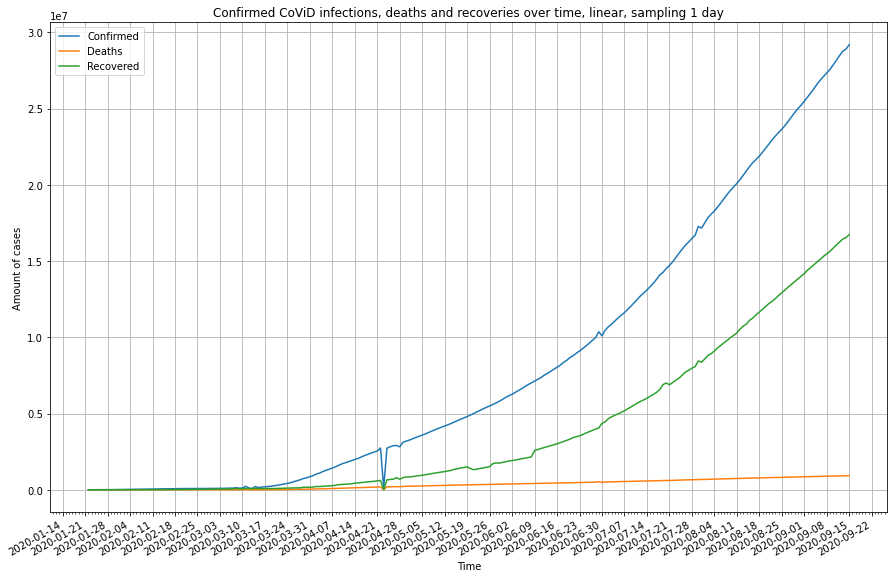

In [53]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Confirmed CoViD infections, deaths and recoveries over time, linear, sampling 1 day")

ax.set(xlabel="Time", ylabel="Amount of cases")
plt.plot(df["Last_Update"], df["Confirmed"])
plt.plot(df["Last_Update"], df["Deaths"])
plt.plot(df["Last_Update"], df["Recovered"])


ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Confirmed", "Deaths", "Recovered"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

Due to the exponential nature of these curves (especially the confirmed cases), it will be more interesting to look at it on log scale.

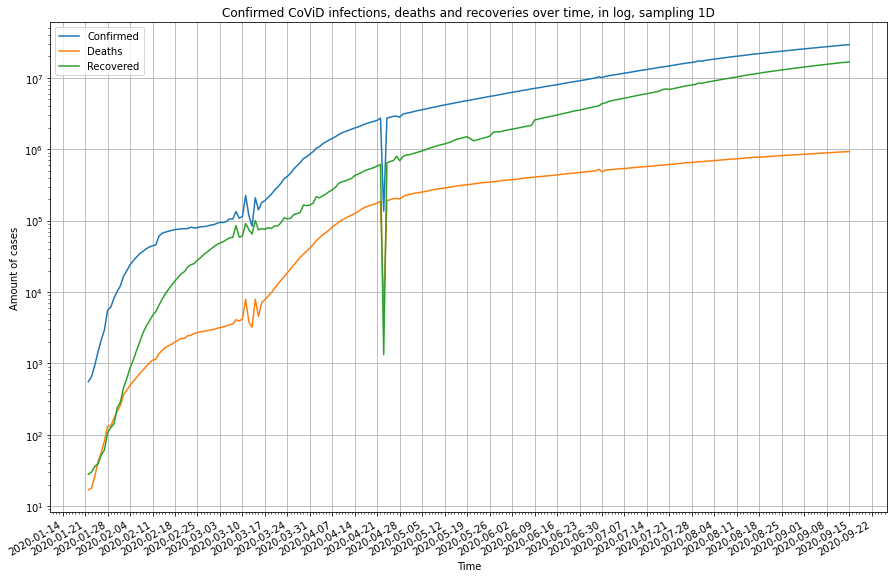

In [54]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Confirmed CoViD infections, deaths and recoveries over time, in log, sampling 1D")

ax.set(xlabel="Time", ylabel="Amount of cases")
plt.plot(df["Last_Update"], df["Confirmed"])
plt.plot(df["Last_Update"], df["Deaths"])
plt.plot(df["Last_Update"], df["Recovered"])
plt.yscale("log")

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Confirmed", "Deaths", "Recovered"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

We note a drop around April 21st, which may be due to incomplete data. This drop can be omitted by grouping by a larger interval, e.g. 2 days. 

In [55]:
df_2D = df[["Last_Update", "Confirmed", "Deaths", "Recovered"]].groupby(pd.Grouper(key="Last_Update", freq="2D")).sum()
df_2D.head(10)

,Confirmed,Deaths,Recovered
Last_Update,,,
2020-01-22,1208.0,35.0,58.0
2020-01-24,2379.0,68.0,75.0
2020-01-26,5045.0,138.0,113.0
2020-01-28,11743.0,264.0,233.0
2020-01-30,18386.0,384.0,382.0
2020-02-01,29091.0,625.0,751.0
2020-02-03,43929.0,916.0,1483.0
2020-02-05,58385.0,1196.0,2627.0
2020-02-07,71563.0,1528.0,4660.0


In [56]:
df_2D = df_2D.reset_index()

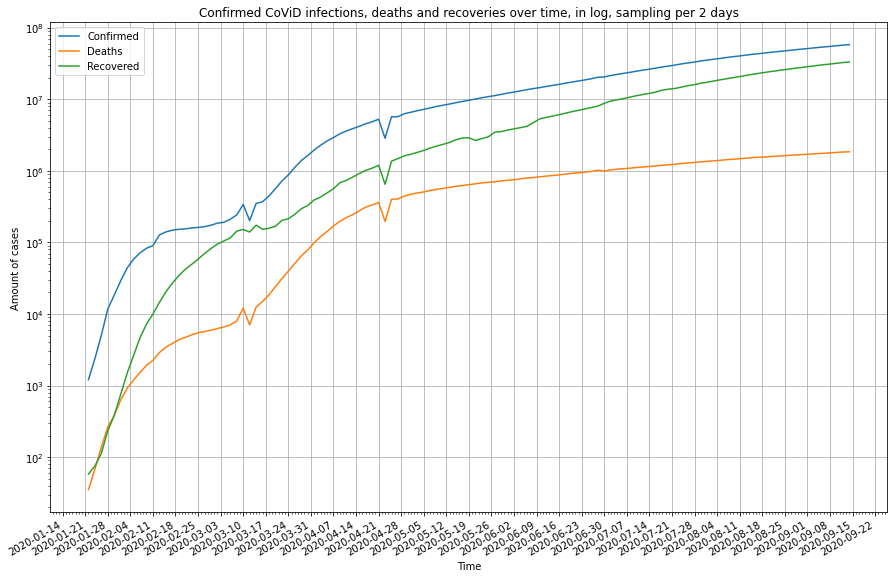

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Confirmed CoViD infections, deaths and recoveries over time, in log, sampling per 2 days")

ax.set(xlabel="Time", ylabel="Amount of cases")
plt.plot(df_2D["Last_Update"], df_2D["Confirmed"])
plt.plot(df_2D["Last_Update"], df_2D["Deaths"])
plt.plot(df_2D["Last_Update"], df_2D["Recovered"])
plt.yscale("log")

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Confirmed", "Deaths", "Recovered"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

### 2.3.2 Analysis of cumulative active cases in Belgium

Next, we want to gain an insight in the spread of the virus by looking at the amount of *active* cases. This will tell us if and when the situation stabilizes. Let's do this for Belgium. Let's group by country, per day and filter for Belgium.

In [58]:
df = df_backup.copy()

df_test = df.groupby(["Country_Region", pd.Grouper(key="Last_Update", freq="1D")]).sum().round(0)
df_test = df_test.reset_index()
df_test = df_test.sort_values(by=["Last_Update", "Country_Region"]) # sort by Last_Update and then by Country_Region
df_test.head(10)

,Country_Region,Last_Update,FIPS,Confirmed,Deaths,Recovered,Latitude,Longitude,Active,Incidence_Rate,Case-Fatality_Ratio
6733,China,2020-01-22,0.0,547.0,17.0,28.0,0.0,0.0,0.0,0.0,0.0
14390,Hong Kong,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16410,Japan,2020-01-22,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19526,Macau,2020-01-22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29302,South Korea,2020-01-22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31031,Taiwan,2020-01-22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31570,Thailand,2020-01-22,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32724,US,2020-01-22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499,Australia,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4313,Brazil,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_belgium = df_test[df_test["Country_Region"] == "Belgium"]
df_belgium.head(20)

,Country_Region,Last_Update,FIPS,Confirmed,Deaths,Recovered,Latitude,Longitude,Active,Incidence_Rate,Case-Fatality_Ratio
3037,Belgium,2020-02-04,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3038,Belgium,2020-02-17,0.0,13.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0
3039,Belgium,2020-03-01,0.0,2.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0
3040,Belgium,2020-03-02,0.0,8.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0
3041,Belgium,2020-03-03,0.0,13.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0
3042,Belgium,2020-03-04,0.0,23.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0
3043,Belgium,2020-03-05,0.0,50.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0
3044,Belgium,2020-03-06,0.0,109.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0
3045,Belgium,2020-03-07,0.0,169.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0
3046,Belgium,2020-03-08,0.0,200.0,0.0,1.0,51.0,4.0,0.0,0.0,0.0


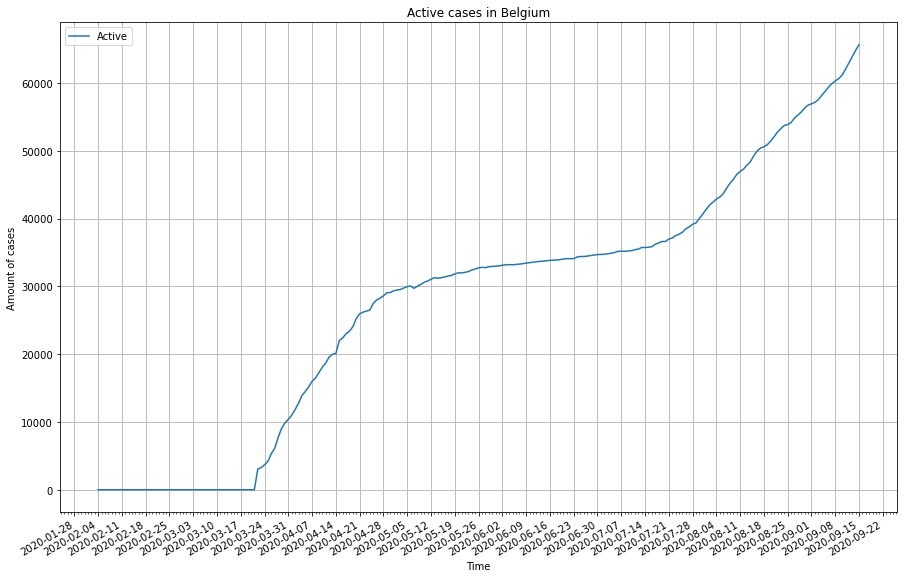

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Active cases in Belgium")

ax.set(xlabel="Time", ylabel="Amount of cases")
plt.plot(df_belgium["Last_Update"], df_belgium["Active"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Active"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

The graph above shows a flattening of the curve between mid May and mid July, telling us the situation (and thus the spread of the virus) was not worsening. At the start of August, the number of active cases start to increase again, indicating a worsening of the situation. The virus clearly infected many people during August, continuing into September, which could be attributed to various reasons, one being people returning home from holiday and having been infected abroad who then spread the virus while travelling or upon returning home and not self-isolating immediately. 

### 2.3.3 Daily cases in South Korea

Let's look at the amount of cases per day for South Korea. We will have to group entries per country. This data is not included in the dataset, but can be calculated. We simply have to substract the previous day's cases from the current day to get the current day's cases. We sort by the column **Last_Update** before doing so. We will add this as a new column to the dataset and use the **Combined_Key** for this.

In [61]:
df_soko = df[df["Country_Region"] == "South Korea"]
df_soko = df_soko.groupby([pd.Grouper(key="Last_Update", freq="1D")])["Confirmed"].sum()
df_soko = df_soko.reset_index()

df_soko = df_soko.sort_values(["Last_Update"])

df_soko.head(300)

,Last_Update,Confirmed
0,2020-01-22,1.0
1,2020-01-23,1.0
2,2020-01-24,2.0
3,2020-01-25,2.0
4,2020-01-26,3.0
...,...,...
233,2020-09-11,21919.0
234,2020-09-12,22055.0
235,2020-09-13,22176.0
236,2020-09-14,22285.0


In [62]:
df_soko["Daily cases"] = df_soko["Confirmed"].diff()

In [63]:
df_soko.head(75)

,Last_Update,Confirmed,Daily cases
0,2020-01-22,1.0,NaN
1,2020-01-23,1.0,0.0
2,2020-01-24,2.0,1.0
3,2020-01-25,2.0,0.0
4,2020-01-26,3.0,1.0
...,...,...,...
70,2020-04-01,9887.0,101.0
71,2020-04-02,9976.0,89.0
72,2020-04-03,10062.0,86.0
73,2020-04-04,10156.0,94.0


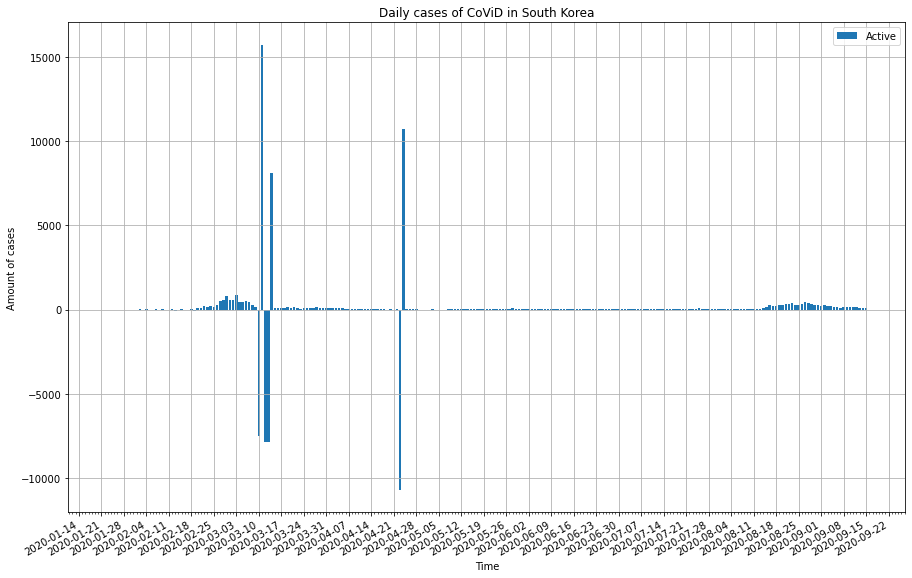

In [64]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Daily cases of CoViD in South Korea")

ax.set(xlabel="Time", ylabel="Amount of cases")
plt.bar(df_soko["Last_Update"], df_soko["Daily cases"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Active"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

Notice that there are some wrong entries in the dataset. Further analysis shows that there are some entries present that report a cumulative amount of cases (**Confirmed**) of 0, i.e. lower than the previous day, which is obviously not possible. Thus, we will remove these entries from the dataset.

In [65]:
df_soko = df_soko[df_soko["Daily cases"] > 0]
df_soko["Daily cases"] = df_soko["Confirmed"].diff()

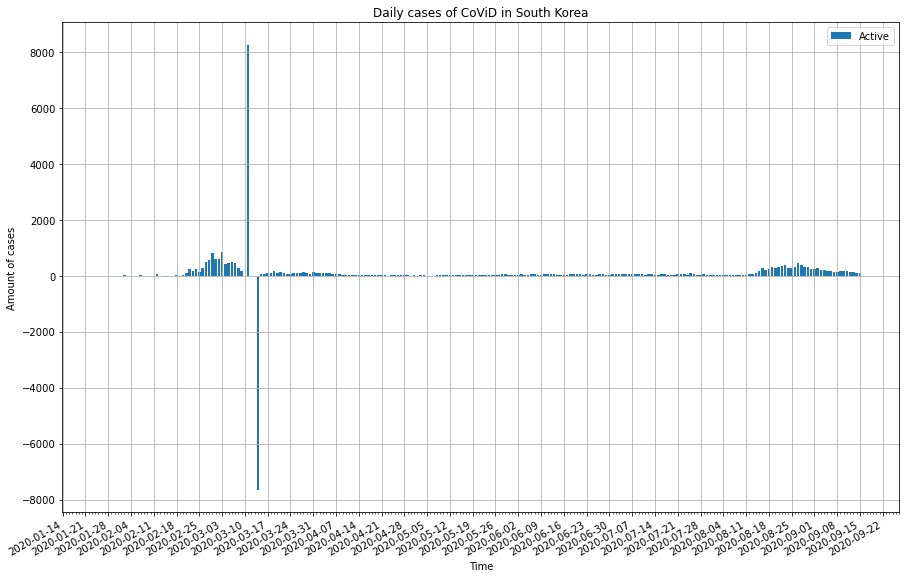

In [66]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Daily cases of CoViD in South Korea")

ax.set(xlabel="Time", ylabel="Amount of cases")
plt.bar(df_soko["Last_Update"], df_soko["Daily cases"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Active"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

There are still some wrong entries:
```
47,2020-03-09,7478.0,164.0
49,2020-03-11,15734.0,8256.0
52,2020-03-14,8086.0,-7648.0
```

Note how entry 49 shows a confirmed totla of 15734, which is then later adjusted back down to 8086, potentially due to some double counting and corrections being done. Thus, it is gives us these two major spikes. We will remove entry 49 and recalculate the difference.


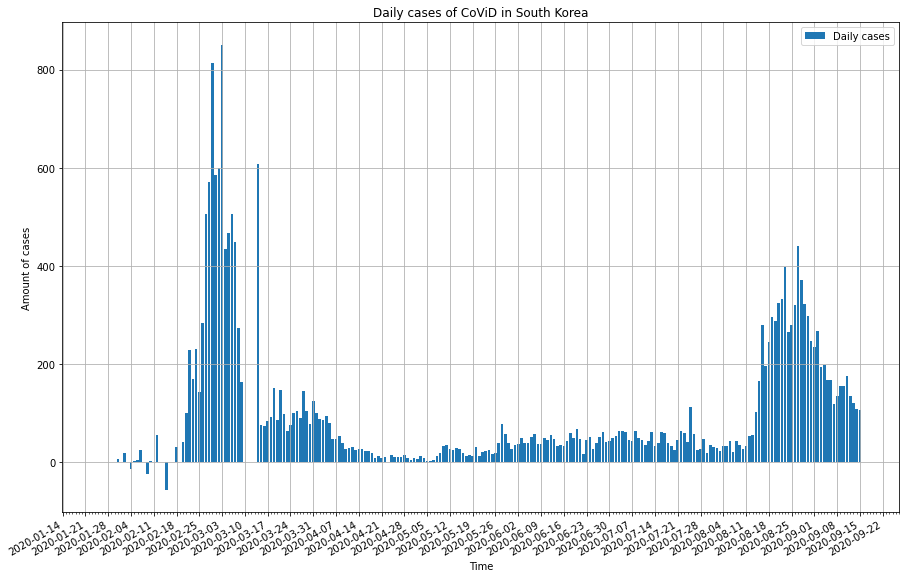

In [67]:
df_soko = df_soko.drop([49])
df_soko["Daily cases"] = df_soko["Confirmed"].diff()

fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Daily cases of CoViD in South Korea")

ax.set(xlabel="Time", ylabel="Amount of cases")
plt.bar(df_soko["Last_Update"], df_soko["Daily cases"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Daily cases"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

South-Korea's response was very adequate, allowing them to control the situation fairly quickly. Only recently have they seen an uptick in cases. There has, however, been a decline in daily cases throughout September.

### 2.3.4 Case-Fatality Ratios for Belgium, The Netherlands and the United States

Next, we would like to look at the case fatality ratio. As previously mentioned, this is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period. We will select only Belgium and The Netherlands and group by day, taking the mean of the case fatality ratios within that day if there are multiple. It should be noted that the mean may then be influenced by certain regions with low population but high fatality rate, showing a worse case-fatality ratio than reality. Due to the limitations of the dataset, we will accept this but take note of it. 

In [68]:
df = df_backup.copy()

In [69]:
df_be = df[df["Country_Region"] == "Belgium"]
df_nl = df[df["Country_Region"] == "Netherlands"]
df_us = df[df["Country_Region"] == "US"]

In [70]:
df_be_cfr = df_be[["Last_Update", "Case-Fatality_Ratio"]].groupby(pd.Grouper(key="Last_Update", freq="1D")).mean()
df_be_cfr = df_be_cfr.reset_index()

df_nl_cfr = df_nl[["Last_Update", "Case-Fatality_Ratio"]].groupby(pd.Grouper(key="Last_Update", freq="1D")).mean()
df_nl_cfr = df_nl_cfr.reset_index()

df_us_cfr = df_us[["Last_Update", "Case-Fatality_Ratio"]].groupby(pd.Grouper(key="Last_Update", freq="1D")).mean()
df_us_cfr = df_us_cfr.reset_index()

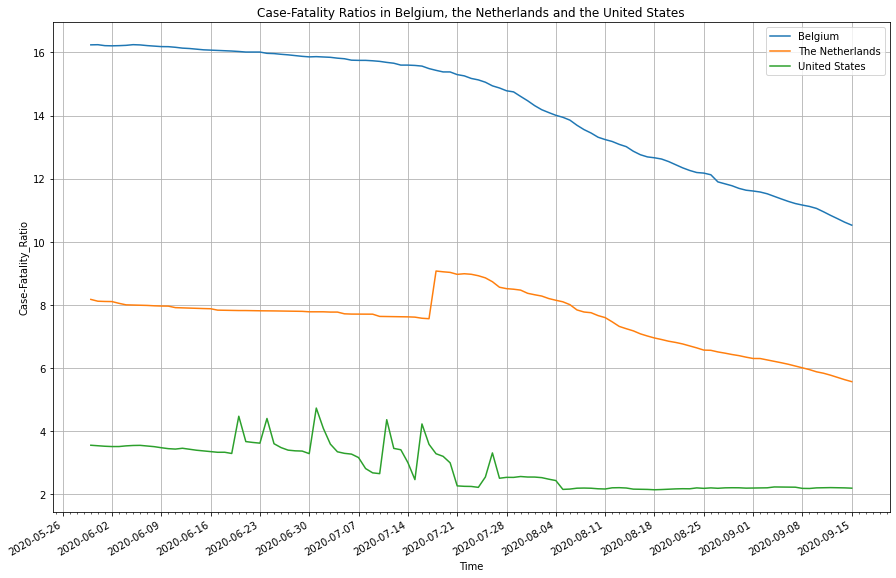

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Case-Fatality Ratios in Belgium, the Netherlands and the United States")

ax.set(xlabel="Time", ylabel="Case-Fatality_Ratio")
plt.plot(df_be_cfr["Last_Update"], df_be_cfr["Case-Fatality_Ratio"])
plt.plot(df_nl_cfr["Last_Update"], df_nl_cfr["Case-Fatality_Ratio"])
plt.plot(df_us_cfr["Last_Update"], df_us_cfr["Case-Fatality_Ratio"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Belgium", "The Netherlands", "United States"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

We can conclude that the worst country here is Belgium, although there has been a steady decline in the case-fatality ratio since July. Again, averages were taken. The fact that the US has such a low case-fatality ratio is due to the fact that its regions are most likely underreporting or not reporting this ratio at all, skewing the average.

### 2.3.5 Mortality rate per 100,000 for Belgium, The Netherlands and the United States

Another interesting graph looks at the mortality rate per 100,000 inhabitants, reflecting how badly hit a country truly is, rather than working with absolute figures. Countries with more inhabitants will have more deaths and thus become difficult to compare to smaller countries. The mortality rate per 100,000 inhabitants solves this issue and gives a more honest view.

In [72]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Anhui,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Anhui, China",NaN,NaN
1,NaN,NaN,Beijing,China,2020-01-22 17:00:00,14.0,NaN,NaN,NaN,NaN,NaN,"Beijing, China",NaN,NaN
2,NaN,NaN,Chongqing,China,2020-01-22 17:00:00,6.0,NaN,NaN,NaN,NaN,NaN,"Chongqing, China",NaN,NaN
3,NaN,NaN,Fujian,China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,"Fujian, China",NaN,NaN
4,NaN,NaN,Gansu,China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"Gansu, China",NaN,NaN


In [79]:
us_population = 328200000
be_population = 11460000
nl_population = 17280000

df_be = df[df["Country_Region"] == "Belgium"]
df_nl = df[df["Country_Region"] == "Netherlands"]
df_us = df[df["Country_Region"] == "US"]

df_be_d = df_be[["Last_Update", "Deaths"]].groupby(pd.Grouper(key="Last_Update", freq="1D")).sum()
df_be_d = df_be_d.reset_index()

df_nl_d = df_nl[["Last_Update", "Deaths"]].groupby(pd.Grouper(key="Last_Update", freq="1D")).sum()
df_nl_d = df_nl_d.reset_index()

df_us_d = df_us[["Last_Update", "Deaths"]].groupby(pd.Grouper(key="Last_Update", freq="1D")).sum()
df_us_d = df_us_d.reset_index()

In [80]:
df_be_d["Deaths"] = df_be_d["Deaths"].div(be_population)
df_be_d["Deaths"] = df_be_d["Deaths"].mul(100000)

df_nl_d["Deaths"] = df_nl_d["Deaths"].div(nl_population)
df_nl_d["Deaths"] = df_nl_d["Deaths"].mul(100000)

df_us_d["Deaths"] = df_us_d["Deaths"].div(us_population)
df_us_d["Deaths"] = df_us_d["Deaths"].mul(100000)


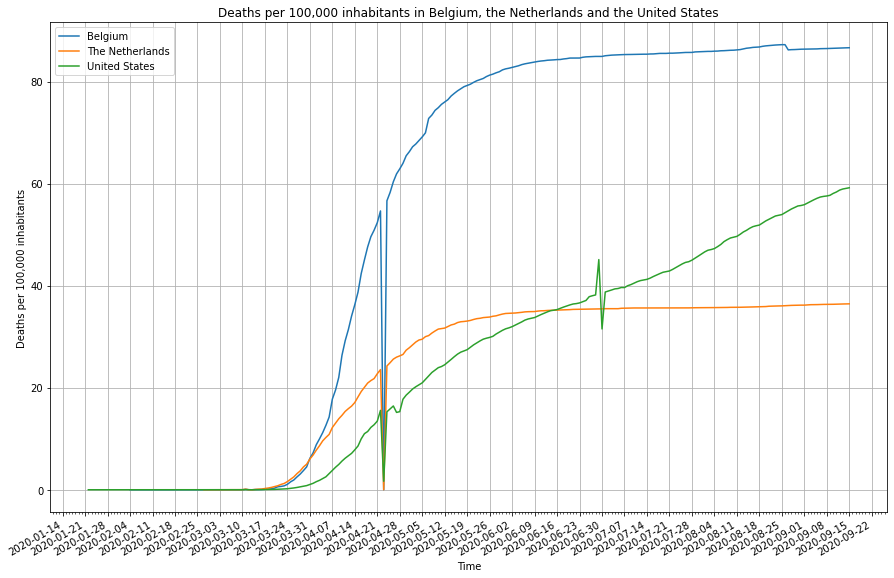

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Deaths per 100,000 inhabitants in Belgium, the Netherlands and the United States")

ax.set(xlabel="Time", ylabel="Deaths per 100,000 inhabitants")
plt.plot(df_be_d["Last_Update"], df_be_d["Deaths"])
plt.plot(df_nl_d["Last_Update"], df_nl_d["Deaths"])
plt.plot(df_us_d["Last_Update"], df_us_d["Deaths"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator()) # major tick
ax.xaxis.set_minor_locator(mdates.DayLocator()) # minor tick
ax.grid(True)
ax.legend(["Belgium", "The Netherlands", "United States"])
fig.autofmt_xdate() # auto format the date on x axis

plt.show()

We clearly notice from the above graph that the deaths per 100,000 inhabitants is highest for Belgium. The Netherlands was initially second, with the United States being third, but the United States has surpassed The Netherlands in deaths per 100,000 inhabitants since mid June. Belgium is clearly still higher than the United States, despite the latter having the highest amount of cases. The flattening of these curves indicates that deaths per 100,0000 inhabitants remains steady and that fewer people are dying. This observation only counts for Belgium and the Netherlands. The United States has continued to increase its death rate, indicating that the amount of people dying is not slowing down. 

### 2.3.6 Other

Other visualisations could include: 

* a map that shows a bubble at a given latitude and longitude indicating the number of cases in that region.